In [110]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import operator

In [2]:
start = dt.datetime(2020, 1, 1)

In [3]:
index = web.DataReader('TM', "yahoo", start).index

In [4]:
high = pd.DataFrame(index=index)
low = pd.DataFrame(index=index)
openn = pd.DataFrame(index=index)
close = pd.DataFrame(index=index)
volume = pd.DataFrame(index=index)
adj_close = pd.DataFrame(index=index)

### Japan

In [5]:
'''stocks_japan = ['TM', '8058.T', 'HMC', '1JP.F', 'NPEXY', 'ITOCY', 'NSANY', 'SFTBY', 'HTHIY', 'JXHLY',
                'SNE','AONNY', 'PCRFY', 'MARUY', 'DCNSF', 'MITSY', 'SVNDY', 'TYHOF', 'MUFG', 'TOELY', \
                'NISTF', 'SMFG', 'MSADY', 'TKOMY', 'DNZOY', 'SOMMY', 'KDDIY', 'MIELY', 'DWAHY', 'MHVYF', \
                'ASEKY', 'CAJ', 'FJTSY', 'MFG', 'MTLHY', 'IDKOY', 'JFEEF', 'SZKMY', 'TOSBF', 'BRDCY', \
                'NHOLF', 'SSUMY', 'MZDAY', 'KAEPY', 'MAHLY', 'SMTOF', 'FUJHY', 'CHUEF', 'EJPRY', 'NEC1.F']    
df = {}

# fill datasets
for ticker in stocks_japan:
    d_ticker = web.DataReader(ticker, "yahoo", start)
    
    if ticker == '8058.T':
        ticker = 'Mitsubishi'
    
    high[ticker] = d_ticker.High
    low[ticker] = d_ticker.Low
    openn[ticker] = d_ticker.Open
    close[ticker] = d_ticker.Close
    adj_close[ticker] = d_ticker['Adj Close']

# save data:
high.to_csv('datasets_stocks/japan_high.csv')
low.to_csv('datasets_stocks/japan_low.csv')
openn.to_csv('datasets_stocks/japan_open.csv')
close.to_csv('datasets_stocks/japan_close.csv')
adj_close.to_csv('datasets_stocks/japan_adj_close.csv')'''

high = pd.read_csv('datasets_stocks/japan_high.csv')
low = pd.read_csv('datasets_stocks/japan_low.csv')
openn = pd.read_csv('datasets_stocks/japan_open.csv')
close = pd.read_csv('datasets_stocks/japan_close.csv')
adj_close = pd.read_csv('datasets_stocks/japan_adj_close.csv')

In [6]:
# create dictionary of datasets
datasets = {'high':high, 'low':low, 'open':openn, 'close':close, 'adj_close':adj_close}

In [7]:
columns = high.columns
columns

Index(['Date', 'TM', 'Mitsubishi', 'HMC', '1JP.F', 'NPEXY', 'ITOCY', 'NSANY',
       'SFTBY', 'HTHIY', 'JXHLY', 'SNE', 'AONNY', 'PCRFY', 'MARUY', 'DCNSF',
       'MITSY', 'SVNDY', 'TYHOF', 'MUFG', 'TOELY', 'NISTF', 'SMFG', 'MSADY',
       'TKOMY', 'DNZOY', 'SOMMY', 'KDDIY', 'MIELY', 'DWAHY', 'MHVYF', 'ASEKY',
       'CAJ', 'FJTSY', 'MFG', 'MTLHY', 'IDKOY', 'JFEEF', 'SZKMY', 'TOSBF',
       'BRDCY', 'NHOLF', 'SSUMY', 'MZDAY', 'KAEPY', 'MAHLY', 'SMTOF', 'FUJHY',
       'CHUEF', 'EJPRY', 'NEC1.F'],
      dtype='object')

### Fill NaNs

In [102]:
def fill_nan (dataset, index):
    
    # count nans:
    num_nans = dataset.isna().values.sum()
    print(f"Totally, in the dataset there are {num_nans} NaNs values")
    if num_nans>0:
        if 'Date' in dataset.columns:
            dataset = dataset.drop('Date', axis=1) # drop date because the next line works only with floats
        dataset = (dataset.ffill() + dataset.bfill())/2
        dataset['Date'] = index # reintegrate the index
    
        num_nans = dataset.isna().values.sum()
        print(f"After the filling thought the mean, in the dataset there are {num_nans} NaNs values")

        if num_nans>0:
            # the still missing values are at the beginning or at the end. fill them with the first or last non NaN value
            dataset = dataset.ffill()
            dataset = dataset.bfill()
            print(f"After the filling of first/last values, in the dataset there are {dataset.isna().values.sum()} NaNs values")

    return dataset

In [22]:
for dataset in datasets.items():
    name = dataset[0]
    print(f"\n{name} \n")
    dataset = dataset[1]
    
    dataset = fill_nan (dataset, index)
    
    datasets.update({name:dataset})


high 

Totally, n the dataset there are 0 NaNs values

low 

Totally, n the dataset there are 0 NaNs values

open 

Totally, n the dataset there are 0 NaNs values

close 

Totally, n the dataset there are 0 NaNs values

adj_close 

Totally, n the dataset there are 0 NaNs values

mean_stock 

Totally, n the dataset there are 0 NaNs values


### Mean open and close price

In [23]:
mean_stock = pd.DataFrame()

for ticker in columns:
    if ticker!='Date':
        meann = (datasets['open'].drop('Date', axis=1)[ticker]  + datasets['close'].drop('Date', axis=1)[ticker] )/2
        mean_stock[ticker] = meann
        
mean_stock['Date'] = index
mean_stock = mean_stock.set_index('Date')    
datasets['mean_stock'] = mean_stock

In [24]:
mean_stock.head()

,TM,Mitsubishi,HMC,1JP.F,NPEXY,ITOCY,NSANY,SFTBY,HTHIY,JXHLY,...,NHOLF,SSUMY,MZDAY,KAEPY,MAHLY,SMTOF,FUJHY,CHUEF,EJPRY,NEC1.F
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,142.120003,2880.00,28.620000,8.35,12.31,46.295000,11.600,21.849999,85.520000,9.200,...,40.75,14.865,4.270,5.86,22.510000,15.1556,12.450,14.7,14.870,36.900000
2020-01-03,140.989998,2880.00,28.190000,8.45,12.31,46.280001,11.610,21.730000,83.635002,9.060,...,40.75,14.685,4.230,5.86,22.510000,15.1556,12.230,14.7,14.930,36.200001
2020-01-06,140.115005,2880.00,27.884999,8.35,12.31,46.540001,11.530,21.175000,85.425003,9.485,...,40.75,14.870,4.205,5.86,21.950001,15.0700,12.315,14.7,14.895,37.599998
2020-01-07,141.820000,2899.00,28.299999,8.45,12.31,46.679998,11.650,21.285000,84.899998,9.470,...,40.75,14.880,4.230,5.86,21.950001,15.0700,12.260,14.7,14.900,38.799999
2020-01-08,141.035004,2872.75,28.059999,8.45,12.31,46.769999,11.715,21.290000,84.865002,9.535,...,40.75,14.820,4.195,5.86,21.950001,15.0700,12.130,14.7,15.095,39.600000


## Most important stocks Analysis

In [302]:
mean_stock_best = mean_stock[list(highest_name)]
mean_stock_best.head()

,Mitsubishi,MITSY,SZKMY,TM,SNE
Date,,,,,
2020-01-02,2880.00,361.305008,170.089996,142.120003,68.680000
2020-01-03,2880.00,354.510010,167.394997,140.989998,68.290001
2020-01-06,2880.00,357.800003,166.092499,140.115005,68.680000
2020-01-07,2899.00,358.365005,168.044998,141.820000,70.355000
2020-01-08,2872.75,362.014999,164.750000,141.035004,70.630001


## Correlation Matrix

In [303]:
corr = mean_stock_best.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Mitsubishi,MITSY,SZKMY,TM,SNE
Mitsubishi,1.00,0.75,0.61,0.74,0.09
MITSY,0.75,1.00,0.89,0.88,0.64
SZKMY,0.61,0.89,1.00,0.87,0.77
TM,0.74,0.88,0.87,1.00,0.62
SNE,0.09,0.64,0.77,0.62,1.00


In [282]:
# order highest mean stocks

highest_mean = datasets['mean_stock'].mean(axis = 0).sort_values(ascending=False) [:5]
highest_name = highest_mean.keys()
highest_name

Index(['Mitsubishi', 'MITSY', 'SZKMY', 'TM', 'SNE'], dtype='object')

### Plot time series closing price

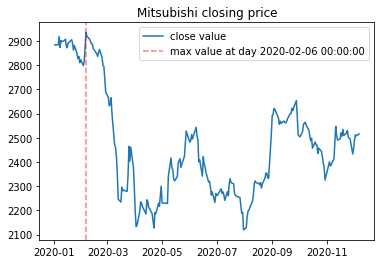

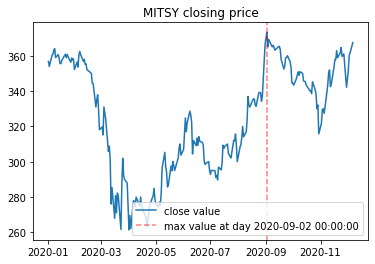

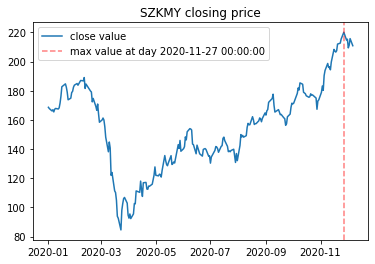

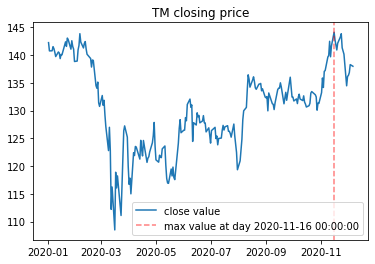

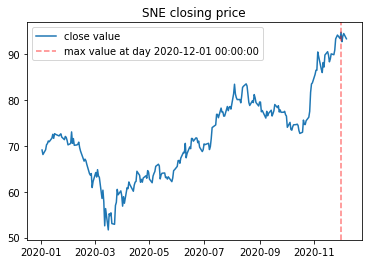

In [26]:
for name in highest_name:
    stock_path = datasets['close'][name]
    
    # find highest price
    stock_max_date = index[stock_path.idxmax()]
    
    #plot time series
    plt.plot(index, stock_path, label='close value')
    # plot max
    plt.axvline(x=stock_max_date, color='red', linestyle='--', alpha=0.5, label='max value at day {}'.format(stock_max_date))
    
    title = name + ' closing price'
    plt.title(title)
    plt.legend()
    plt.show()

### Plot difference difference open closing

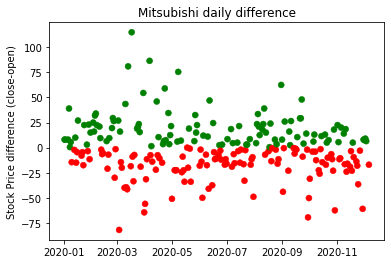

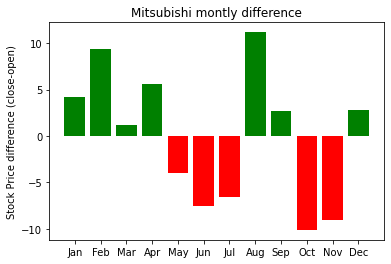

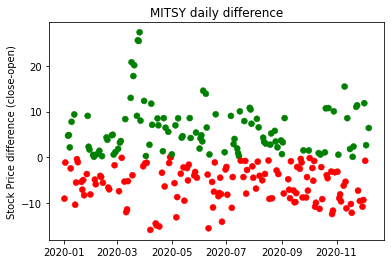

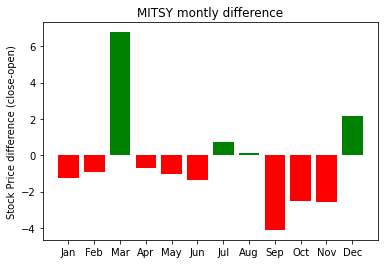

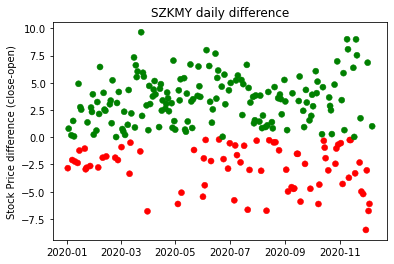

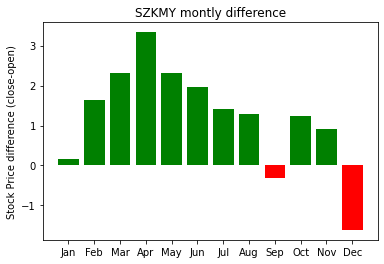

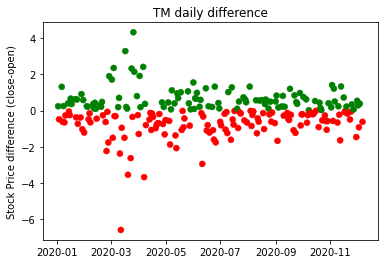

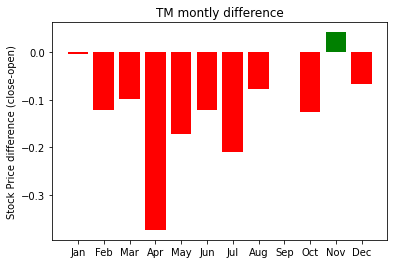

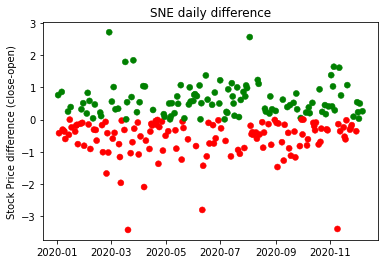

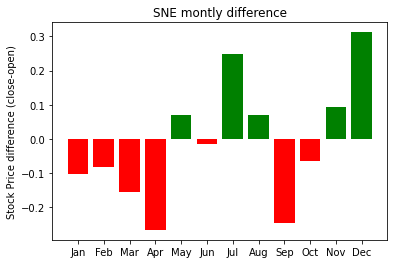

In [266]:
months_index = index.month
months_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
datasets['close']['month'] = months_index
df_lost_percentage = pd.DataFrame(index=index)

for name in highest_name:
    mean_close = datasets['close'][name]
    mean_open = datasets['open'][name]
    difference = mean_close - mean_open
    df_lost_percentage[name] = difference.values/mean_open.values*100
    
    diff = pd.DataFrame(index=index)
    diff['month'] = months_index
    diff['diff'] = difference.values
    means_diff = diff.groupby('month').mean()['diff']
    
    #plot daily scatter points
    colors = ['g' if x>0 else 'r' for x in difference]
    plt.scatter(index, difference, color=colors, linewidth=0.5)
    title = name + ' daily difference'
    plt.ylabel('Stock Price difference (close-open)')
    plt.title(title)
    plt.show()
    
    #plt.fill_between(index, mean_close, mean_open)
    
    #plot histograms
    colors = ['g' if x>0 else 'r' for x in means_diff]
    plt.bar(months_name, means_diff, color=colors)
    title = name + ' montly difference'
    plt.ylabel('Stock Price difference (close-open)')
    plt.title(title)
    plt.show()
    

In [267]:
df_lost_percentage.head()

,Mitsubishi,MITSY,SZKMY,TM,SNE
Date,,,,,
2020-01-02,0.278164,-2.484624,-1.655878,0.169018,1.112730
2020-01-03,0.278164,-0.332299,0.473050,-0.339868,-0.613136
2020-01-06,0.278164,1.327932,0.111444,0.939336,1.260074
2020-01-07,1.354402,1.362591,-1.236026,-0.436228,-0.439661
2020-01-08,0.017406,0.595665,0.914634,0.177418,-0.480232


## Decompose the closing price of the stock into trend, seasonal, and remainder components.

## SP500

In [154]:
# Download all SP500 data

def get_sp500_stocks_data(start, end):
    # current sp500 components (tickers list)
    sp_assets = pd.read_html(
        'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    assets = sp_assets.Symbol.tolist()
    # Download historical data to a multi-index DataFrame
    try:
        data = yf.download(assets, start=start, end=end, as_panel=False)
        filename = 'sp_components_data.pkl'
        data.to_pickle(filename)
        print('Data saved at {}'.format(filename))
    except ValueError:
        print('Failed download, try again.')
        data = None
    return data


In [155]:
'''df_sp500_stocks = get_sp500_stocks_data(start, None)
df_sp500_stocks.to_csv('datasets_stocks/sp500_stocks.csv')'''

"df_sp500_stocks = get_sp500_stocks_data(start, None)\ndf_sp500_stocks.to_csv('datasets_stocks/sp500_stocks.csv')"

In [224]:
df_sp500_stocks = pd.read_csv('datasets_stocks/sp500_stocks.csv')
index_sp500 = df_sp500_stocks["Unnamed: 0"]

# only Adj Close prices, no volume
columns_adj_prices = [col for col in df_sp500_stocks if col.startswith('Adj Close')]
df_sp500_stocks = df_sp500_stocks[columns_adj_prices]

df_sp500_stocks.head()

,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,Adj Close.9,...,Adj Close.495,Adj Close.496,Adj Close.497,Adj Close.498,Adj Close.499,Adj Close.500,Adj Close.501,Adj Close.502,Adj Close.503,Adj Close.504
0,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84.76229858398438,28.574403762817383,158.89895629882812,72.19286346435547,83.89559936523438,83.53189849853516,170.58999633789062,85.51184844970703,207.2430877685547,329.80999755859375,...,96.29391479492188,64.61932373046875,56.16490936279297,35.31545639038086,77.76145935058594,98.8283462524414,148.73587036132812,255.44000244140625,50.02912139892578,131.59608459472656
3,85.398193359375,28.982892990112305,158.1548309326172,73.84004211425781,84.85260772705078,83.59085845947266,168.80999755859375,85.60044860839844,206.8297119140625,334.42999267578125,...,100.11534881591797,65.656494140625,56.50235366821289,35.372928619384766,78.80762481689453,100.24114990234375,148.25889587402344,259.1400146484375,50.530181884765625,133.3759002685547
4,84.02704620361328,27.548194885253906,158.1647491455078,73.12215423583984,84.04720306396484,82.53959655761719,166.82000732421875,84.5569076538086,206.4852294921875,331.80999755859375,...,97.81067657470703,65.12865447998047,55.8770866394043,34.91316604614258,79.271484375,99.92719268798828,147.87135314941406,256.04998779296875,49.817134857177734,133.39578247070312


In [225]:
# correct columns names:

df_sp500_stocks = df_sp500_stocks.rename(columns=df_sp500_stocks.iloc[0]) # rename columns first line
df_sp500_stocks = df_sp500_stocks.drop(df_sp500_stocks.index[0]) # dlete first line
df_sp500_stocks = df_sp500_stocks.drop(df_sp500_stocks.index[0]) # delete data row'''
df_sp500_stocks['Date'] = index_sp500[2:] # we check this was fine !
df_sp500_stocks = df_sp500_stocks.set_index('Date')

df_sp500_stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,84.76229858398438,28.574403762817383,158.89895629882812,72.19286346435547,83.89559936523438,83.53189849853516,170.58999633789062,85.51184844970703,207.2430877685547,329.80999755859375,...,96.29391479492188,64.61932373046875,56.16490936279297,35.31545639038086,77.76145935058594,98.8283462524414,148.73587036132812,255.44000244140625,50.02912139892578,131.59608459472656
2020-01-02,85.398193359375,28.982892990112305,158.1548309326172,73.84004211425781,84.85260772705078,83.59085845947266,168.80999755859375,85.60044860839844,206.8297119140625,334.42999267578125,...,100.11534881591797,65.656494140625,56.50235366821289,35.372928619384766,78.80762481689453,100.24114990234375,148.25889587402344,259.1400146484375,50.530181884765625,133.3759002685547
2020-01-03,84.02704620361328,27.548194885253906,158.1647491455078,73.12215423583984,84.04720306396484,82.53959655761719,166.82000732421875,84.5569076538086,206.4852294921875,331.80999755859375,...,97.81067657470703,65.12865447998047,55.8770866394043,34.91316604614258,79.271484375,99.92719268798828,147.87135314941406,256.04998779296875,49.817134857177734,133.39578247070312
2020-01-06,84.27545166015625,27.219409942626953,155.5653839111328,73.70481872558594,84.71047973632812,83.74805450439453,179.0399932861328,84.99991607666016,205.13690185546875,333.7099914550781,...,95.77192687988281,65.62871551513672,56.18476104736328,34.386356353759766,78.75828552246094,99.86833190917969,147.01678466796875,258.010009765625,49.210079193115234,132.3716583251953
2020-01-07,84.53377532958984,27.11977767944336,153.7200469970703,73.35818481445312,84.22723388671875,83.14872741699219,180.35000610351562,84.5273666381836,200.7079620361328,333.3900146484375,...,97.95840454101562,65.09160614013672,56.482505798339844,34.43424987792969,78.46219635009766,100.04493713378906,146.88760375976562,256.4700012207031,48.91136932373047,132.81907653808594


In [226]:
# values from string to float

for c in df_sp500_stocks.columns:
    try:
        df_sp500_stocks[c] = pd.to_numeric(df_sp500_stocks[c])
    except:
        pass
    
print(df_sp500_stocks.info())

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 2019-12-31 to 2020-12-07
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 936.9+ KB
None


In [227]:
def fill_nan_sp500 (dataset, index):
        
    # count nans:
    num_nans = dataset.isna().values.sum()
    print(f"Totally, in the dataset there are {num_nans} NaNs values")
    
    # check if all column null and delete it
    # this is possible only if num_nan>= len(index)
    if num_nans >= len(index):
        dataset_null_column = dataset.isnull().all()
        dataset_null_column = map(operator.not_, dataset_null_column)# we want ot keep true but previous function gives falses
        dataset = dataset.loc[:, dataset_null_column]

    if num_nans>0:
        if 'Date' in dataset.columns:
            dataset = dataset.drop('Date', axis=1) # drop date because the next line works only with floats
        dataset = (dataset.ffill() + dataset.bfill())/2
        dataset['Date'] = index.values # reintegrate the index
    
        num_nans = dataset.isna().values.sum()
        print(f"After the filling thought the mean, in the dataset there are {num_nans} NaNs values")

        if num_nans>0:
            # the still missing values are at the beginning or at the end. fill them with the first or last non NaN value
            dataset = dataset.ffill()
            dataset = dataset.bfill()
            print(f"After the filling of first/last values, in the dataset there are {dataset.isna().values.sum()} NaNs values")

    return dataset

In [228]:
# fill NaN
df_sp500_stocks = fill_nan_sp500(df_sp500_stocks, index_sp500[2:])

Totally, in the dataset there are 915 NaNs values
After the filling thought the mean, in the dataset there are 358 NaNs values
After the filling of first/last values, in the dataset there are 0 NaNs values


In [229]:
df_sp500_stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS,Date
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,84.762299,28.574404,158.898956,72.192863,83.895599,83.531898,170.589996,85.511848,207.243088,329.809998,...,64.619324,56.164909,35.315456,77.761459,98.828346,148.735870,255.440002,50.029121,131.596085,2019-12-31
2020-01-02,85.398193,28.982893,158.154831,73.840042,84.852608,83.590858,168.809998,85.600449,206.829712,334.429993,...,65.656494,56.502354,35.372929,78.807625,100.241150,148.258896,259.140015,50.530182,133.375900,2020-01-02
2020-01-03,84.027046,27.548195,158.164749,73.122154,84.047203,82.539597,166.820007,84.556908,206.485229,331.809998,...,65.128654,55.877087,34.913166,79.271484,99.927193,147.871353,256.049988,49.817135,133.395782,2020-01-03
2020-01-06,84.275452,27.219410,155.565384,73.704819,84.710480,83.748055,179.039993,84.999916,205.136902,333.709991,...,65.628716,56.184761,34.386356,78.758286,99.868332,147.016785,258.010010,49.210079,132.371658,2020-01-06
2020-01-07,84.533775,27.119778,153.720047,73.358185,84.227234,83.148727,180.350006,84.527367,200.707962,333.390015,...,65.091606,56.482506,34.434250,78.462196,100.044937,146.887604,256.470001,48.911369,132.819077,2020-01-07


In [230]:
df_sp500 = df_sp500_stocks.mean(axis=1)
df_sp500.head()

Date
2019-12-31    139.455022
2020-01-02    140.214432
2020-01-03    139.692840
2020-01-06    140.040980
2020-01-07    139.934118
dtype: float64

In [262]:
# sp500 lost in percentage:
diff_perc_sp500 = (df_sp500 - df_sp500.shift(1))/df_sp500*100
diff_perc_sp500.head()

Date
2019-12-31         NaN
2020-01-02    0.541606
2020-01-03   -0.373385
2020-01-06    0.248598
2020-01-07   -0.076366
dtype: float64

In [268]:
df_tomerge = pd.DataFrame(diff_perc_sp500).iloc[1:,:].rename(columns = {0:'sp500'})
df_lost_sp500 = df_lost_percentage.merge( df_tomerge , left_index=True, right_index=True)
df_lost_sp500.head()

,Mitsubishi,MITSY,SZKMY,TM,SNE,sp500
Date,,,,,,
2020-01-02,0.278164,-2.484624,-1.655878,0.169018,1.112730,0.541606
2020-01-03,0.278164,-0.332299,0.473050,-0.339868,-0.613136,-0.373385
2020-01-06,0.278164,1.327932,0.111444,0.939336,1.260074,0.248598
2020-01-07,1.354402,1.362591,-1.236026,-0.436228,-0.439661,-0.076366
2020-01-08,0.017406,0.595665,0.914634,0.177418,-0.480232,0.341329


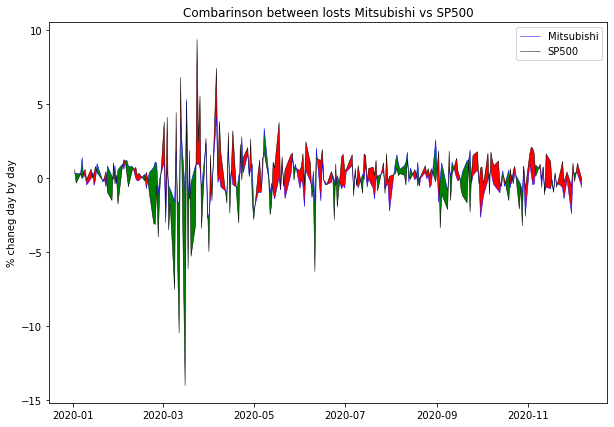

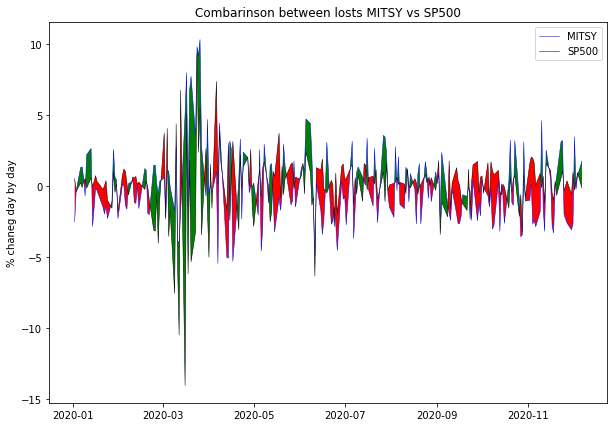

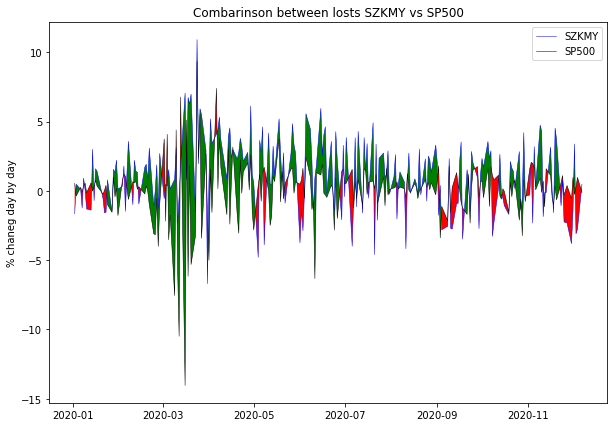

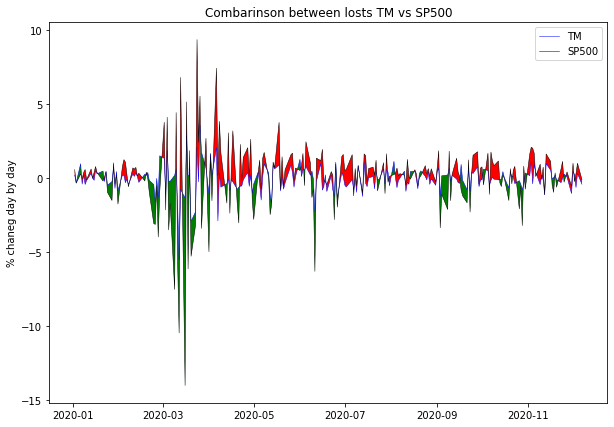

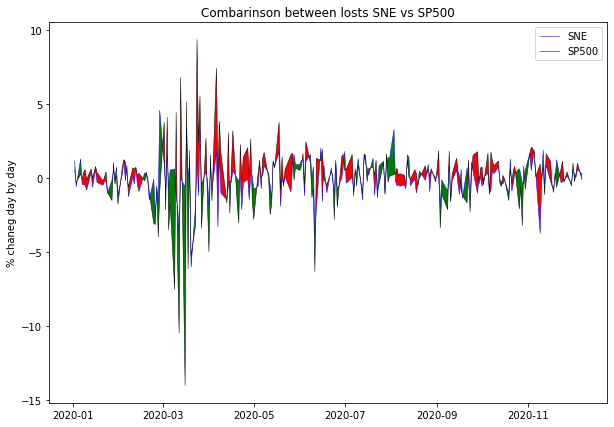

In [305]:
for name in highest_name:
    
    plt.figure(figsize=(10,7))
    y2 = df_lost_sp500[name]
    y1 = df_lost_sp500['sp500']
    plt.plot(index, y2, label=name, color='b', linewidth=0.5)
    plt.plot(index, y1, label='SP500', color='black', linewidth=0.5)
    plt.fill_between(index, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
    plt.fill_between(index, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
    plt.legend()
    title = 'Combarinson between losts ' + name + ' vs SP500'
    plt.title(title)
    plt.ylabel('% chaneg day by day')
    plt.show()

In [ ]:
dataset